In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [3]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
data=data.loc[::-1]

In [5]:
data.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
data1=data.reset_index()['Open']

In [7]:
data1

0       122.10
1       120.30
2       121.80
3       120.10
4       117.60
         ...  
2030    233.55
2031    233.30
2032    240.00
2033    234.55
2034    234.05
Name: Open, Length: 2035, dtype: float64

In [8]:
import matplotlib.pyplot as plt

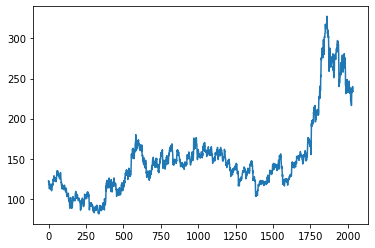

In [9]:
plt.plot(data1)
plt.show()

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [11]:
data1

array([[0.16626115],
       [0.15896188],
       [0.16504461],
       ...,
       [0.64436334],
       [0.62226277],
       [0.6202352 ]])

In [12]:
data1.shape

(2035, 1)

In [13]:
training_size=int(len(data1)*0.65)
test_size=len(data1)-training_size
train_data=data1[0:training_size,:]
test_data=data1[training_size:len(data1),:1]

In [14]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        dataX.append(dataset[i:i+time_step,0])
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)    

In [15]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [16]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [17]:
print(x_train.shape,x_test.shape)

(1221, 100, 1) (612, 100, 1)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 19s 455ms/step - loss: 0.0130 - val_loss: 0.0302
Epoch 2/100
20/20 [==============================] - 7s 334ms/step - loss: 0.0019 - val_loss: 0.0036
Epoch 3/100
20/20 [==============================] - 7s 350ms/step - loss: 0.0010 - val_loss: 0.0040
Epoch 4/100
20/20 [==============================] - 6s 327ms/step - loss: 8.4623e-04 - val_loss: 0.0036
Epoch 5/100
20/20 [==============================] - 6s 316ms/step - loss: 8.0847e-04 - val_loss: 0.0054
Epoch 6/100
20/20 [==============================] - 6s 316ms/step - loss: 8.1925e-04 - val_loss: 0.0037
Epoch 7/100
20/20 [==============================] - 6s 313ms/step - loss: 7.4742e-04 - val_loss: 0.0033
Epoch 8/100
20/20 [==============================] - 6s 316ms/step - loss: 7.4450e-04 - val_loss: 0.0031
Epoch 9/100
20/20 [==============================] - 6s 313ms/step - loss: 6.9838e-04 - val_loss: 0.0032
Epoch 10/100
20/20 [==============================] - 6s 279ms/ste

In [22]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

20/20 [==============================] - 1s 63ms/step


In [23]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

134.80274300542487

In [24]:
math.sqrt(mean_squared_error(y_test,test_predict))

197.3953607581797

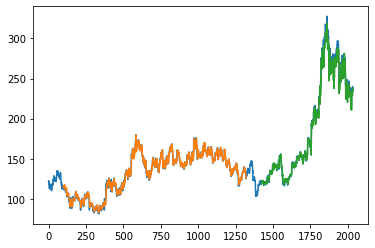

Green : Predicted data
Blue  : Complete data
Orange: Train data


In [30]:
look_back = 100
trainPredictPlot = np.empty_like(data1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back : len(train_predict) + look_back,:] = train_predict

#shift test prediction for plotting
testPredictPlot = np.empty_like(data1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) +  (look_back * 2)+1:len(data1) - 1, :] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green : Predicted data")
print("Blue  : Complete data")
print("Orange: Train data")

In [43]:
len(test_data),x_test.shape

(713, (612, 100, 1))

In [44]:
x_input = test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [45]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
nextNumberOfDays = 28
i = 0

while(i < 28):

    if(len(temp_input) > 100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
        
print(lst_output)    

[0.6035332]
101
1 day input [0.84549878 0.85908354 0.824412   0.80656934 0.71107056 0.64436334
 0.65855637 0.67802109 0.66098946 0.66058394 0.67072182 0.68896999
 0.69383617 0.70397405 0.71492295 0.70113544 0.75385239 0.7648013
 0.74574209 0.70721817 0.736618   0.75344688 0.7404704  0.74817518
 0.736618   0.75385239 0.76520681 0.80312247 0.77230333 0.78487429
 0.7404704  0.7175588  0.71695053 0.72587186 0.74493106 0.74614761
 0.73763179 0.73641525 0.77007299 0.74371452 0.81062449 0.79622871
 0.76520681 0.75892133 0.78994323 0.78548256 0.7676399  0.74574209
 0.71695053 0.65064882 0.6784266  0.6431468  0.60888078 0.63990268
 0.66058394 0.67883212 0.62773723 0.64841849 0.6593674  0.65815085
 0.67964315 0.61394972 0.62814274 0.62469586 0.64841849 0.63321168
 0.63077859 0.63341444 0.61597729 0.62408759 0.6283455  0.64760746
 0.66058394 0.67234388 0.64557989 0.62206002 0.61111111 0.63219789
 0.61942417 0.62550689 0.63219789 0.62814274 0.63706407 0.57137064
 0.57948094 0.56731549 0.57339822 0

8 day output [[0.46820864]]
9 day input [0.66098946 0.66058394 0.67072182 0.68896999 0.69383617 0.70397405
 0.71492295 0.70113544 0.75385239 0.7648013  0.74574209 0.70721817
 0.736618   0.75344688 0.7404704  0.74817518 0.736618   0.75385239
 0.76520681 0.80312247 0.77230333 0.78487429 0.7404704  0.7175588
 0.71695053 0.72587186 0.74493106 0.74614761 0.73763179 0.73641525
 0.77007299 0.74371452 0.81062449 0.79622871 0.76520681 0.75892133
 0.78994323 0.78548256 0.7676399  0.74574209 0.71695053 0.65064882
 0.6784266  0.6431468  0.60888078 0.63990268 0.66058394 0.67883212
 0.62773723 0.64841849 0.6593674  0.65815085 0.67964315 0.61394972
 0.62814274 0.62469586 0.64841849 0.63321168 0.63077859 0.63341444
 0.61597729 0.62408759 0.6283455  0.64760746 0.66058394 0.67234388
 0.64557989 0.62206002 0.61111111 0.63219789 0.61942417 0.62550689
 0.63219789 0.62814274 0.63706407 0.57137064 0.57948094 0.56731549
 0.57339822 0.57339822 0.54845904 0.57725061 0.61658556 0.63584753
 0.62793998 0.62408759 

16 day output [[0.40923223]]
17 day input [0.75385239 0.7648013  0.74574209 0.70721817 0.736618   0.75344688
 0.7404704  0.74817518 0.736618   0.75385239 0.76520681 0.80312247
 0.77230333 0.78487429 0.7404704  0.7175588  0.71695053 0.72587186
 0.74493106 0.74614761 0.73763179 0.73641525 0.77007299 0.74371452
 0.81062449 0.79622871 0.76520681 0.75892133 0.78994323 0.78548256
 0.7676399  0.74574209 0.71695053 0.65064882 0.6784266  0.6431468
 0.60888078 0.63990268 0.66058394 0.67883212 0.62773723 0.64841849
 0.6593674  0.65815085 0.67964315 0.61394972 0.62814274 0.62469586
 0.64841849 0.63321168 0.63077859 0.63341444 0.61597729 0.62408759
 0.6283455  0.64760746 0.66058394 0.67234388 0.64557989 0.62206002
 0.61111111 0.63219789 0.61942417 0.62550689 0.63219789 0.62814274
 0.63706407 0.57137064 0.57948094 0.56731549 0.57339822 0.57339822
 0.54845904 0.57725061 0.61658556 0.63584753 0.62793998 0.62408759
 0.61820762 0.61719384 0.64436334 0.62226277 0.6202352  0.60353321
 0.58101994 0.5587145

24 day output [[0.3885353]]
25 day input [0.736618   0.75385239 0.76520681 0.80312247 0.77230333 0.78487429
 0.7404704  0.7175588  0.71695053 0.72587186 0.74493106 0.74614761
 0.73763179 0.73641525 0.77007299 0.74371452 0.81062449 0.79622871
 0.76520681 0.75892133 0.78994323 0.78548256 0.7676399  0.74574209
 0.71695053 0.65064882 0.6784266  0.6431468  0.60888078 0.63990268
 0.66058394 0.67883212 0.62773723 0.64841849 0.6593674  0.65815085
 0.67964315 0.61394972 0.62814274 0.62469586 0.64841849 0.63321168
 0.63077859 0.63341444 0.61597729 0.62408759 0.6283455  0.64760746
 0.66058394 0.67234388 0.64557989 0.62206002 0.61111111 0.63219789
 0.61942417 0.62550689 0.63219789 0.62814274 0.63706407 0.57137064
 0.57948094 0.56731549 0.57339822 0.57339822 0.54845904 0.57725061
 0.61658556 0.63584753 0.62793998 0.62408759 0.61820762 0.61719384
 0.64436334 0.62226277 0.6202352  0.60353321 0.58101994 0.55871457
 0.53914928 0.52209437 0.50678486 0.49278235 0.47993678 0.46820864
 0.45757183 0.4479860

In [46]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

In [47]:
data1_new = data1.tolist()
data1_new.extend(lst_output)

len(data1)

2035

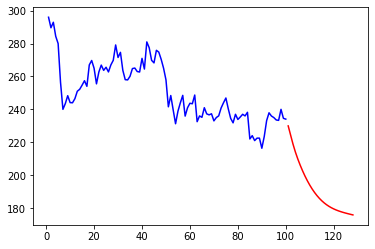

In [49]:
plt.plot(day_new,scaler.inverse_transform(data1[1935:]),'b')
plt.plot(day_pred,scaler.inverse_transform(lst_output),'r')
plt.show()

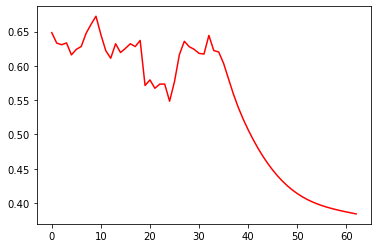

In [50]:
data1_new = data1.tolist()
data1_new.extend(lst_output)
plt.plot(data1_new[2000:],'r')
plt.show()

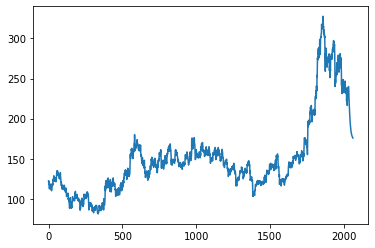

In [53]:
data1_new = scaler.inverse_transform(data1_new).tolist()
plt.plot(data1_new)
plt.show()